#### Exercise 1
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [9]:
import pandas as pd
taxi_data=pd.read_csv('/workspaces/student-weekly-1-Arun-prasadh18/part-2/data/2019_Yellow_Taxi_Trip_Data.csv')
taxi_data[['fare_amount','tip_amount','tolls_amount','total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 2
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [17]:
taxi_data.loc[taxi_data['trip_distance']==max(taxi_data['trip_distance'])][['fare_amount','tip_amount','tolls_amount','total_amount']]

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


#### Exercise 3
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [25]:
meteorite_df=pd.read_csv('/workspaces/student-weekly-1-Arun-prasadh18/part-2/data/Meteorite_Landings.csv')
meteorite_df=meteorite_df.rename(columns={'mass (g)':'mass'})
meteorite_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


#### Exercise 4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [26]:
meteorite_df['year']=meteorite_df['year'].str.slice(start=6, stop=10)
print(type(meteorite_df['year'][0]))
meteorite_df['year']=pd.to_numeric(meteorite_df['year'])
print(type(meteorite_df['year'][0]))
meteorite_df['observed_metorite']=meteorite_df['year']<1970

<class 'str'>
<class 'numpy.float64'>


In [62]:
meteorite_df['observed_metorite']
#meteorite_df.set_index('id',inplace=True)
meteorite_df.sort_index(inplace=True)
#meteorite_df
meteorite_df.loc[10036:10040]

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,observed_metorite
id,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,31.33333,-82.31667,"(31.33333, -82.31667)",True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,39.86667,-83.95000,"(39.86667, -83.95)",True
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,30.30000,109.50000,"(30.3, 109.5)",False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",True


#### Exercise 5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [11]:
taxi_data['tpep_dropoff_datetime']=pd.to_datetime(taxi_data['tpep_dropoff_datetime'])
type(taxi_data['tpep_dropoff_datetime'][0])
taxi_data.set_index('tpep_dropoff_datetime', inplace=True)
top5 = taxi_data.resample('H')[['trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']].agg('sum')
top_tips = top5.nlargest(5, 'tip_amount')


/tmp/ipykernel_1574/1308572903.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  top5 = taxi_data.resample('H')[['trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']].agg('sum')


In [12]:
top_tips

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


#### Exercise 6
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

travelers    Axes(0.125,0.11;0.775x0.77)
dtype: object

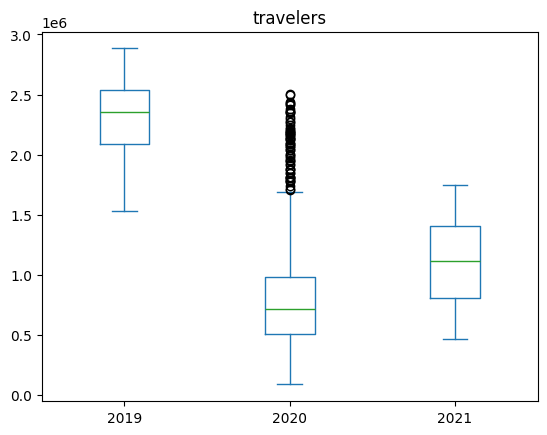

In [60]:
tsa_df=pd.read_csv('/workspaces/student-weekly-1-Arun-prasadh18/part-2/data/tsa_melted_holiday_travel.csv')
tsa_df.plot(kind='box',by='year')

In [16]:
tsa_df.columns

Index(['date', 'year', 'travelers', 'holiday'], dtype='object')

#### Exercise 7
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [63]:
import seaborn as sns
#date_format = "%Y-%m-%d"
#tsa_df['date'] = datetime.strptime(tsa_df['date'].apply(str), date_format)
tsa_df['date'] = pd.to_datetime(tsa_df['date'])
print(type(tsa_df['date'][0]))
print(len(tsa_df))
#tsa_df_2019 = tsa_df[tsa_df['date'].dt.year == 2019]
#len(tsa_df_2019)
#sns.heatmap(tsa_df)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
864


<Axes: xlabel='month', ylabel='day_of_week'>

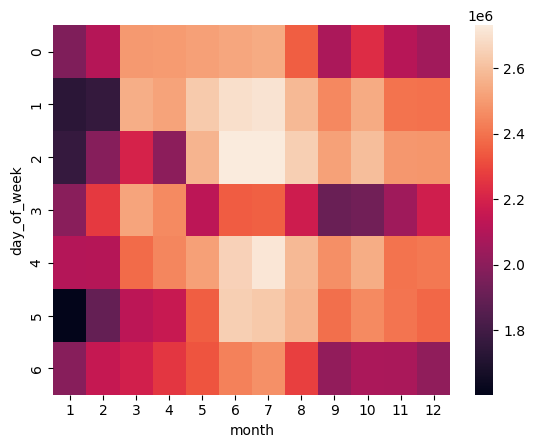

In [64]:
data = tsa_df[tsa_df['date'].dt.year == 2019]\
    .assign(month=lambda x: x['date'].dt.month,
    day_of_week=lambda x: x['date'].dt.dayofweek  # 0=Monday, 6=Sunday
).pivot_table(index='day_of_week', columns='month', values='travelers', aggfunc='median')
#tsa_df['date']
sns.heatmap(data)